In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load data
csvPath = "data/"
file1 = "suicide.csv"
file2 = "2015.csv"
file3 = "2016.csv"
file4 = "2017.csv"

# https://www.kaggle.com/unsdsn/world-happiness/download#2016.csv
# https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/downloads/suicide-rates-overview-1985-to-2016.zip/1

df_suicide = pd.DataFrame(pd.read_csv(csvPath + file1))
df_happy_2015 = pd.DataFrame(pd.read_csv(csvPath + file2))
df_happy_2016 = pd.DataFrame(pd.read_csv(csvPath + file3))
df_happy_2017 = pd.DataFrame(pd.read_csv(csvPath + file4)) 

# showcase one data point to see if data is loaded correctly
print("df_suicide:")
print(df_suicide[0:1])
print("\n\ndf_happy_2015:")
print(df_happy_2015[0:1])
# print("\n\ndf_happy_2016:")
# print(df_happy_2016[0:1])
# print("\n\ndf_happy_2017:")
# print(df_happy_2017[0:1])


df_suicide:
   country  year   sex          age  suicides_no  population  \
0  Albania  1987  male  15-24 years           21      312900   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)    generation  
0                 796  Generation X  


df_happy_2015:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  


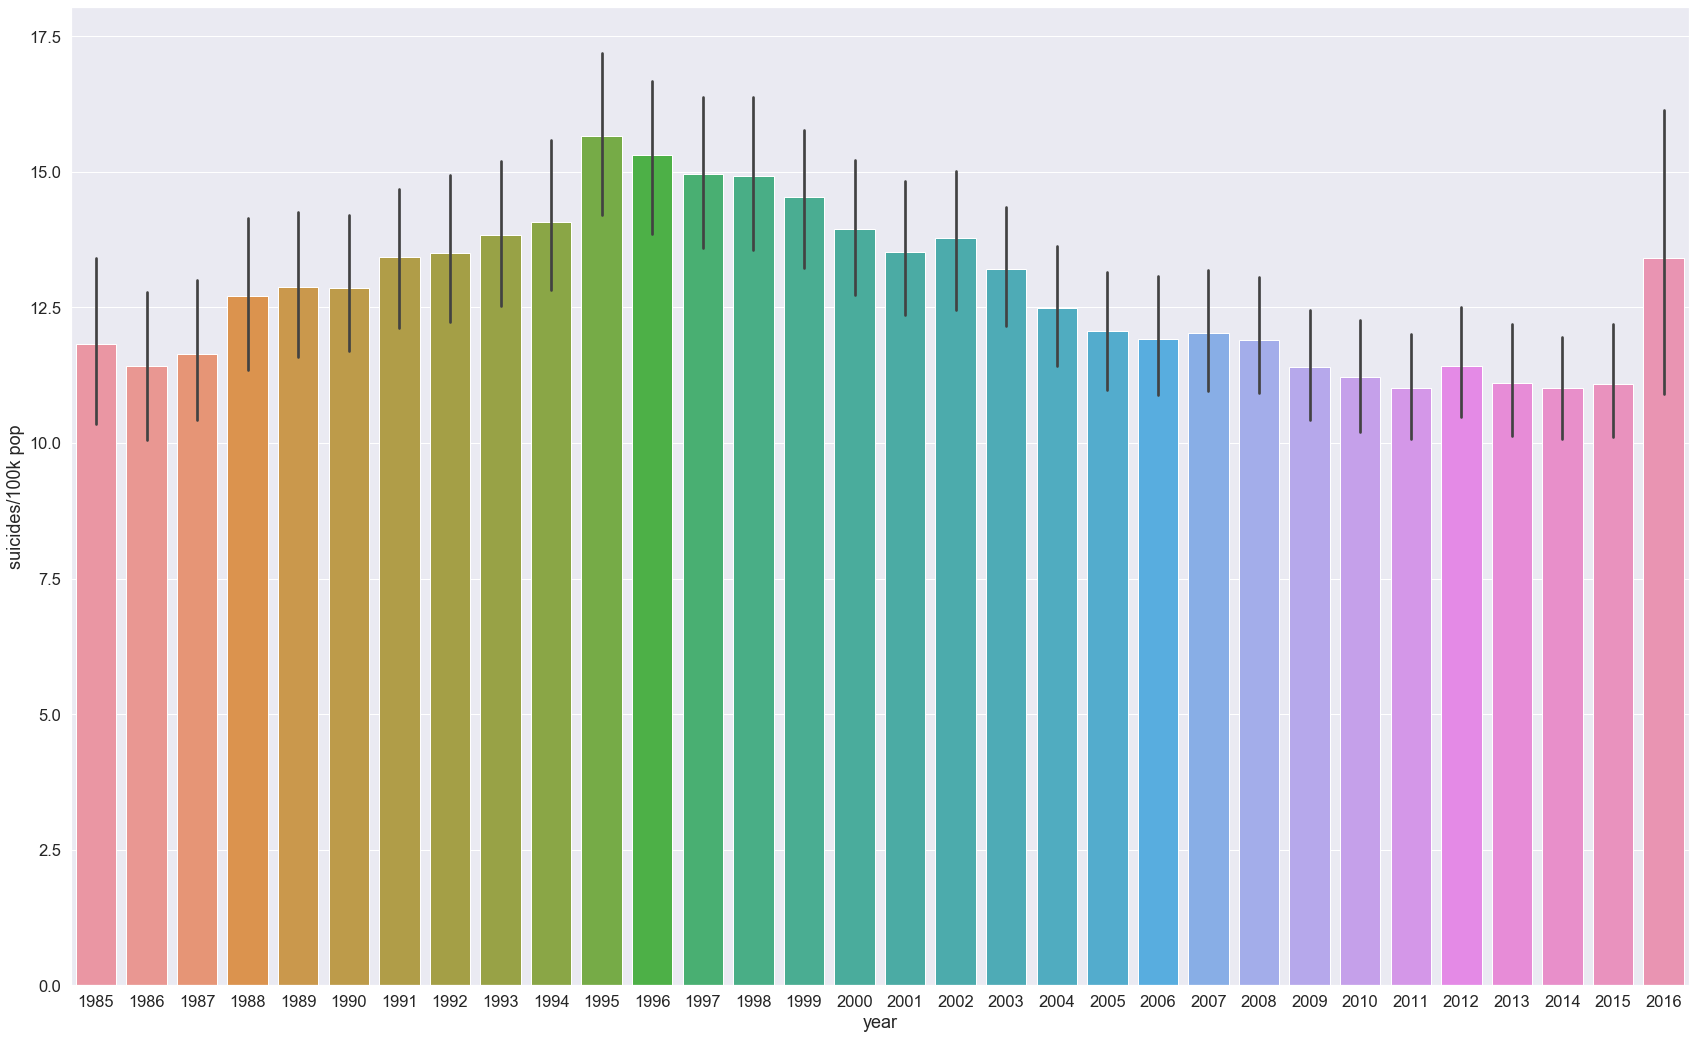

In [24]:
## visulize df_suicide
# bar chart showing that the average suicide rate trends per year
plt.figure(figsize=(29, 18))
sns.set(font_scale=1.5)
ax = sns.barplot(x = "year", y = "suicides/100k pop", data = df_suicide)


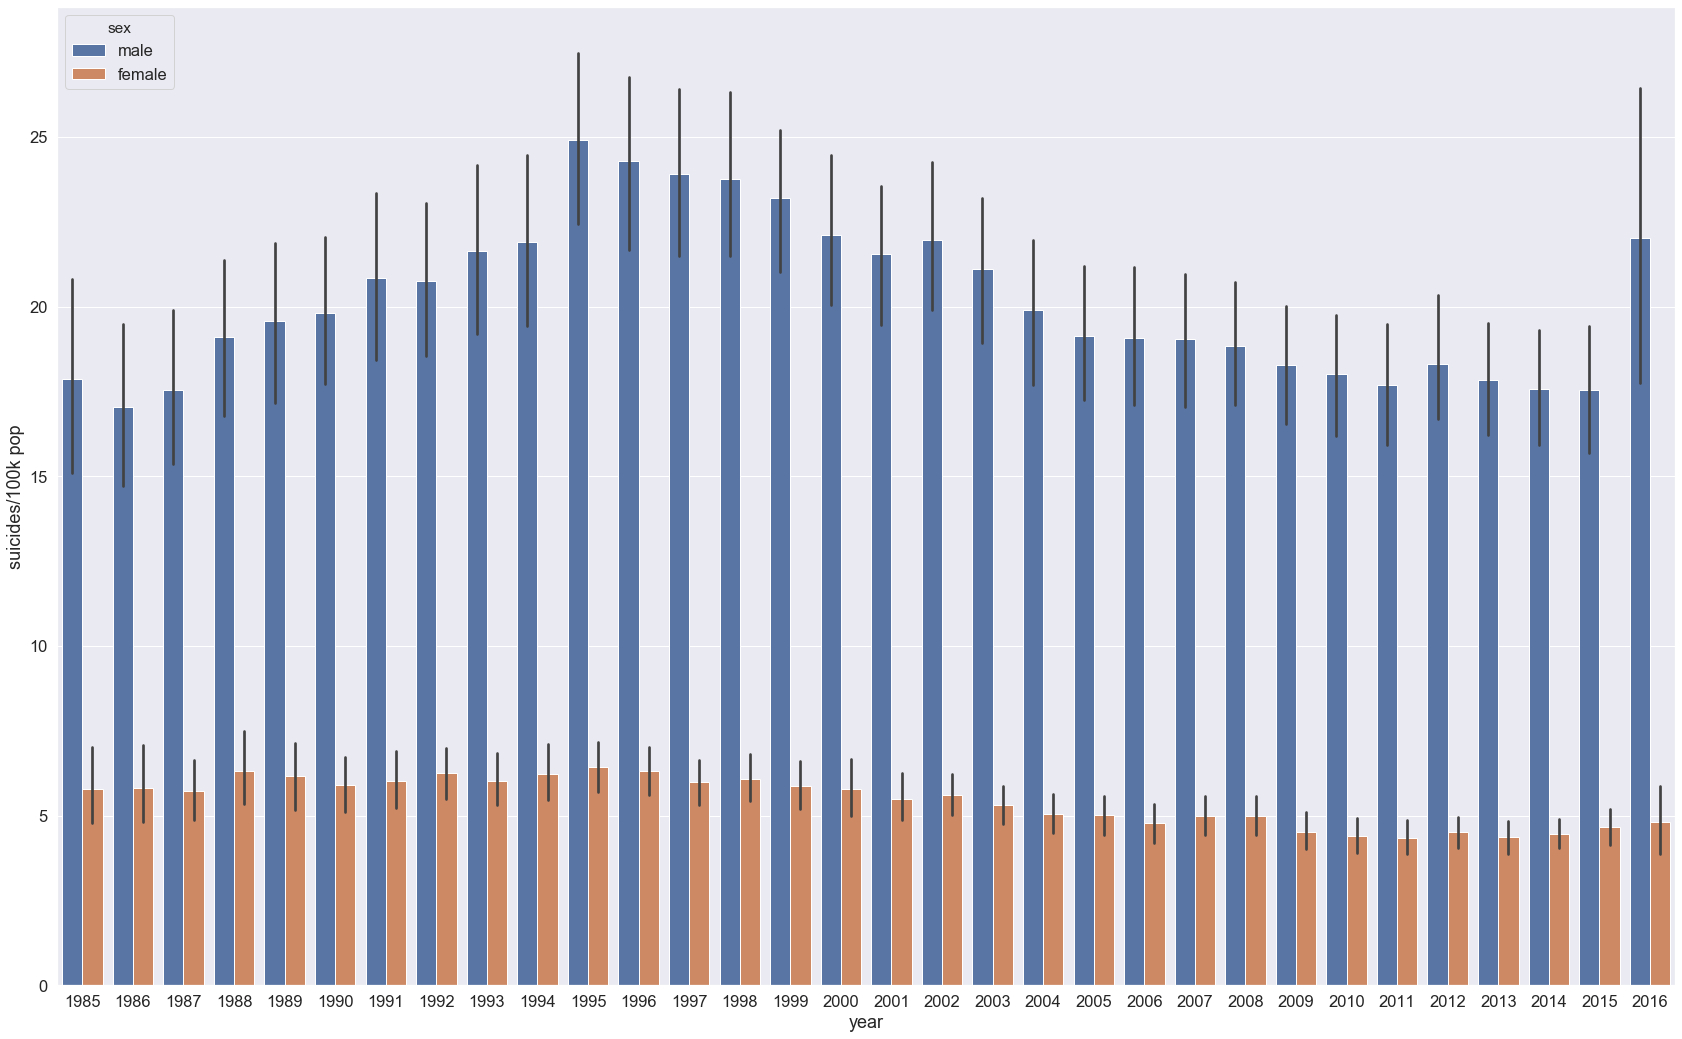

In [27]:
# what happens if we distinguish gender?
plt.figure(figsize=(29, 18))
sns.set(font_scale=1.5)
ax = sns.barplot(x = "year", y = "suicides/100k pop", hue = "sex" ,data = df_suicide)

# interesting...

In [36]:
# now let's focus on year 2015
# first we must make sure the countries are almost the same in 2 data sets
# Theoretically should do this before visulization, 
# but the kaggle maintained these data sets pretty well

data_2015 = df_happy_2015.to_numpy()
countries = set([])
for r in data_suicide:
    country = r[0]
    countries.add(country)

data_suicide = df_suicide.to_numpy()
for r in data_suicide:
    country = r[0]
    year = r[1]
    if year == 2015 and country not in countries:
        print(country)
        
print("check done!")

check done!


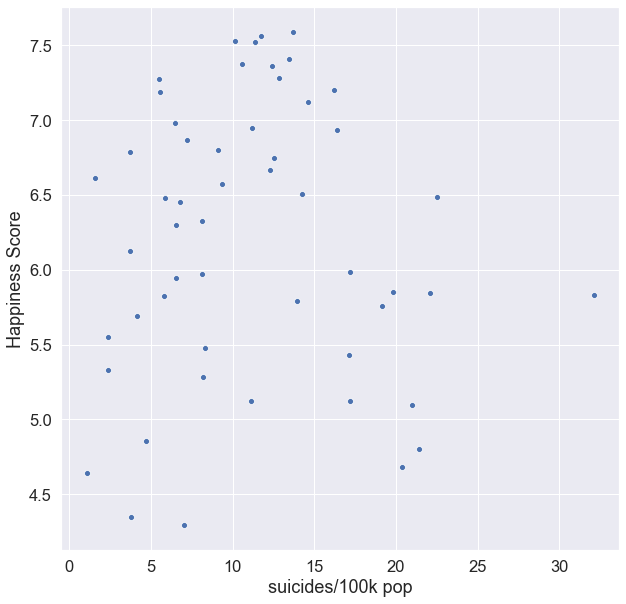

In [60]:
# good, now let's combine these 2 data sets
# make sure 2 dataFrame has the same column name for 'country'
df_happy_2015.columns = ['country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
# pick suicide record for year 2015
df_suicide_2015 = df_suicide[df_suicide.year == 2015]
df_group_suicide_2015 = df_suicide_2015.groupby("country").mean()
df_suicide_happy_2015 = df_group_suicide_2015.merge(df_happy_2015, on = 'country')

# scatter plot showing the suicide rate associated with happiness score
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y = "Happiness Score", x = "suicides/100k pop", data = df_suicide_happy_2015)

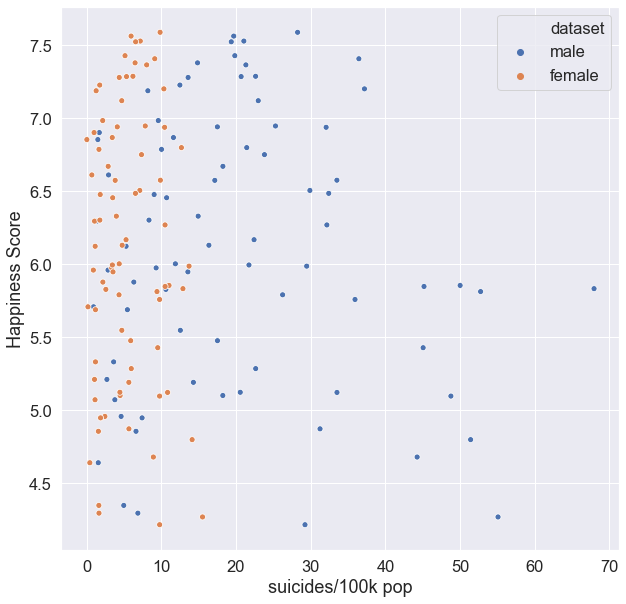

In [66]:
# let's see if gender affacts here
df_suicide_male_2015 = df_suicide[df_suicide.sex == 'male']
df_group_suicide_male_2015 = df_suicide_male_2015.groupby("country").mean()
df_suicide_male_happy_2015 = df_group_suicide_male_2015.merge(df_happy_2015, on = 'country')

df_suicide_female_2015 = df_suicide[df_suicide.sex == 'female']
df_group_suicide_female_2015 = df_suicide_female_2015.groupby("country").mean()
df_suicide_female_happy_2015 = df_group_suicide_female_2015.merge(df_happy_2015, on = 'country')

concatenated_2015 = pd.concat([df_suicide_male_happy_2015.assign(dataset='male'), 
                          df_suicide_female_happy_2015.assign(dataset='female')])

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y = "Happiness Score", x = "suicides/100k pop", hue='dataset', data = concatenated_2015)

# Finding:
# 1) In general female has lower suicide rate compared to male.
# 2) The suicide rate for female stays in a relatively narrow band whereas male has higher suicide rate 
#    and higher variance.
# 3) Higher happiness socre tends to prevent male from killing themselves, sort of.
# 4) It's dangerous to be male.

(160, 12)


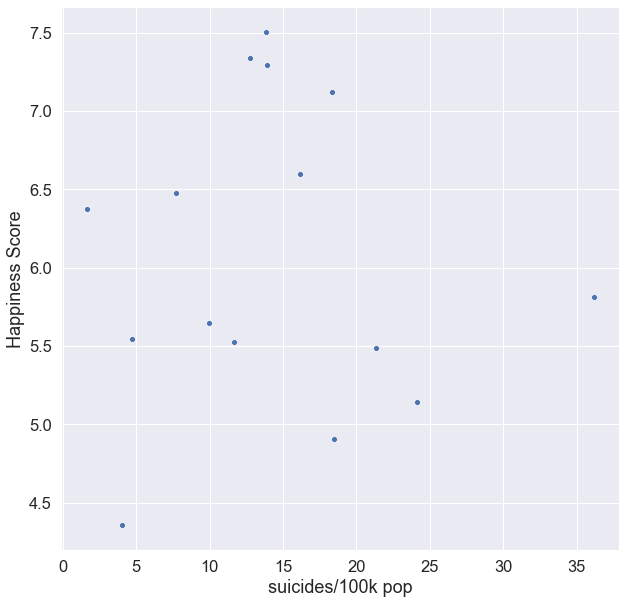

In [70]:
# let's see if 2016 has the same pattern.
df_happy_2016.columns = ['country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']


df_suicide_2016 = df_suicide[df_suicide.year == 2016]
df_group_suicide_2016 = df_suicide_2016.groupby("country").mean()
df_suicide_happy_2016 = df_group_suicide_2016.merge(df_happy_2016, on = 'country')

# scatter plot showing the suicide rate associated with happiness score
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y = "Happiness Score", x = "suicides/100k pop", data = df_suicide_happy_2016)

# hmm, somehow 2016 has fewer records than 2015
# print(df_suicide_2016.shape)
# print(df_suicide_2015.shape)

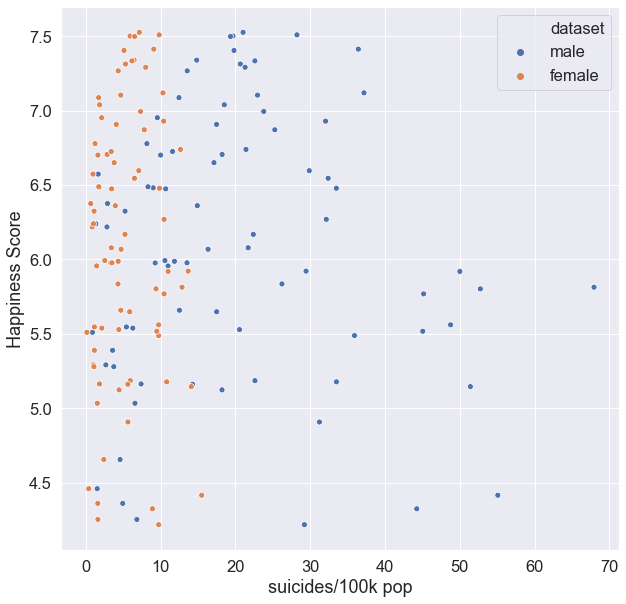

In [71]:
df_suicide_male_2016 = df_suicide[df_suicide.sex == 'male']
df_group_suicide_male_2016 = df_suicide_male_2016.groupby("country").mean()
df_suicide_male_happy_2016 = df_group_suicide_male_2016.merge(df_happy_2016, on = 'country')

df_suicide_female_2016 = df_suicide[df_suicide.sex == 'female']
df_group_suicide_female_2016 = df_suicide_female_2016.groupby("country").mean()
df_suicide_female_happy_2016 = df_group_suicide_female_2016.merge(df_happy_2016, on = 'country')

concatenated_2016 = pd.concat([df_suicide_male_happy_2016.assign(dataset='male'), 
                          df_suicide_female_happy_2016.assign(dataset='female')])

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y = "Happiness Score", x = "suicides/100k pop", hue='dataset', data = concatenated_2016)

# Luckily the per gender scatter plot still has the same pattern